# Feed-forward and backprop from scratch

### Feed-forward

<div>
<img src="feedforward.png" width="500"/>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

#### Step 1: Create training data

In [2]:
from sklearn.datasets import make_moons

In [3]:
X, y = make_moons(n_samples=50, noise=0.2, random_state=42)

#### Step 2: Take a look at the data

In [6]:
X.shape

(50, 2)

In [7]:
y.shape

(50,)

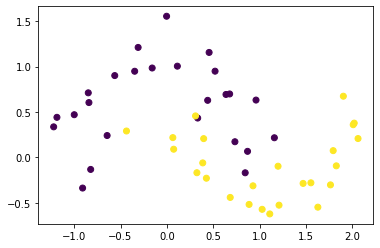

In [9]:
plt.scatter(X[:,0], X[:,1], c=y);

#### Step 3: Add a bias (parameter b) column to X

In [24]:
np.hstack([X, np.ones((X.shape[0], 1))])

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

In [25]:
def add_bias(X):
    
    return  np.hstack([X, np.ones((X.shape[0], 1))])

In [26]:
X = add_bias(X)

In [27]:
X

array([[-0.15856989,  0.98480618,  1.        ],
       [ 1.10900374, -0.62160223,  1.        ],
       [ 0.39641523,  0.20740869,  1.        ],
       [ 1.79239122,  0.07511293,  1.        ],
       [-0.84739307,  0.71154296,  1.        ],
       [ 1.90209657,  0.67432213,  1.        ],
       [ 0.0731551 ,  0.09079042,  1.        ],
       [-0.43566685,  0.29122072,  1.        ],
       [ 0.42577731, -0.22851359,  1.        ],
       [-0.64418143,  0.24144478,  1.        ],
       [ 0.11289285,  1.00510013,  1.        ],
       [ 0.96066405,  0.63183812,  1.        ],
       [ 1.46814927, -0.28580296,  1.        ],
       [ 0.5192833 ,  0.94984582,  1.        ],
       [ 0.73327397,  0.17310931,  1.        ],
       [ 0.33197143,  0.43375035,  1.        ],
       [ 1.62726102, -0.54736954,  1.        ],
       [ 2.01908805,  0.37804882,  1.        ],
       [ 2.00824323,  0.36058988,  1.        ],
       [-0.56195047,  0.90148197,  1.        ],
       [ 0.67647169,  0.69909987,  1.   

#### Step 4: calculate the sigmoid activation function

In [28]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [29]:
a = np.array([-10.0, -1.0, 0.0, 1.0, 10.0])
expected = np.array([0.0, 0.27, 0.5, 0.73, 1.0])
assert np.all(sigmoid(a).round(2) == expected)

#### Step 5: Initialize the weights

In [36]:
n_neurons = 2

In [37]:
w = []
w.append(np.random.randn(X.shape[1], n_neurons)) # first layer
w.append(np.random.randn(n_neurons+1, 1)) # second layer/hidden layer

In [38]:
w

[array([[-0.66299053, -0.81279448],
        [ 0.05916487,  0.37925358],
        [ 1.20695721, -0.14899306]]),
 array([[-0.28244138],
        [-0.95269417],
        [-0.65529188]])]

#### Step 6: Put it all together

In [41]:
def feed_forward(X, weights):

    """
    1. Multiply the input matrix X
       with the weights of the first layer.
    """
    step1 = np.dot(X, weights[0])

    """
    2. Apply the sigmoid function on the result.
    """
    step2 = sigmoid(step1)

    """
     3. Append an extra column of ones to the result (i.e. the bias).

    """
    step3 = add_bias(step2)
    
    """
     4. Multiply the output of the previous step
       with the weights of the second (i.e. outer) layer.
    """
    step4 = np.dot(step3, weights[1])

    """
    5. Apply the sigmoid function on the result.
    """
    step5 = sigmoid(step4)
    
    
    """
    6. Return all intermediate results (i.e. anything that is outputted
       by an activation function).
    """
    

    return step2, step5

In [42]:
out1, out2 = feed_forward(X, w)
assert out1.shape == (50, 2)
assert out2.shape == (50, 1)

Xref = np.array([[1.0, 2.0, 1.0]])
whidden = np.array([[1.0, 2.0, 0.0],
                 [-1.0, -2.0, 0.0]
                    ]).T
wout = np.array([[1.0, -1.0, 0.5]]).T

out1, out2 = feed_forward(Xref, [whidden, wout])
assert np.all(out1.round(2) == np.array([[0.99, 0.01]]))
assert np.all(out2.round(2) == np.array([[0.82]]))

### Backpropagation

<div>
<img src="neuron_w_backprop.png" width="500"/>
</div>

**Let's talk about loss function!**

* Here we'll use log loss as a loss function:
$$ loss = -(y_{true} log(y_{pred}) + (1-y_{true}) log(1-y_{pred})) $$

#### Step 1: Run feed-forward and make sure it works

Check!

#### Step 2: Write a Loss Function

##### 2a: Log-loss

$$ loss = -(y_{true} log(y_{pred}) + (1-y_{true}) log(1-y_{pred})) $$

In [44]:
def log_loss(ytrue, ypred):
    loss = -(ytrue*np.log(ypred)+(1-ytrue)*np.log(1-ypred))
    return loss


In [45]:
ytrue = np.array([0.0, 0.0, 1.0, 1.0])
ypred = np.array([0.01, 0.99, 0.01, 0.99])
expected = np.array([0.01, 4.61, 4.61, 0.01])
assert np.all(log_loss(ytrue, ypred).round(2) == expected)

##### 2b: Log-loss derivative

_Formula_

In [46]:
def log_loss_deriv(ytrue, ypred):
    loss_deriv = -(ytrue/ypred - (1-ytrue)/(1-ypred))  
    return loss_deriv

In [47]:
a = np.array([0.5, 0.3, 0.99, 0.2])
b = np.array([0.4, 0.2, 0.10, 0.3])
expected = np.array([-0.42, -0.62, -9.89, 0.48])
assert np.all(log_loss_deriv(a, b).round(2) == expected)

##### Extra — 2c: Sigmoid derivative

_Formula_

In [48]:
def sigmoid_deriv(X):
    return sigmoid(X)*(1-sigmoid(X))

#### Step 3: Calculate initial loss

In [49]:
out1, out2 = feed_forward(X, w)
ytrue = y.reshape(-1, 1)
log_loss(ytrue, out2) #which arrays do we need to compare?

array([[0.2125982 ],
       [1.33750334],
       [1.49677602],
       [1.28505593],
       [0.19119659],
       [1.29729941],
       [1.54535218],
       [1.65072577],
       [1.46198668],
       [0.20554232],
       [0.22406988],
       [0.27356366],
       [1.30790481],
       [0.24456463],
       [0.27115066],
       [0.24563753],
       [1.27914154],
       [1.27170628],
       [1.27222215],
       [0.19825694],
       [0.257596  ],
       [0.20280305],
       [0.2047806 ],
       [1.40759294],
       [1.47997706],
       [0.28345819],
       [1.2737189 ],
       [1.5562985 ],
       [1.35088418],
       [0.25569414],
       [1.53008938],
       [0.23728528],
       [1.37840953],
       [0.28013859],
       [0.18456272],
       [0.2917241 ],
       [1.29819727],
       [1.37320633],
       [0.20478021],
       [1.32927196],
       [0.20930164],
       [0.18428997],
       [0.19292351],
       [1.26105002],
       [0.18960013],
       [0.24705598],
       [1.27480323],
       [0.205

In [50]:
loss = log_loss(ytrue, out2)

In [52]:
[print(a, b, c) for (a,b,c) in zip(ytrue, out2, loss)];


[0] [0.19151908] [0.2125982]
[1] [0.26250022] [1.33750334]
[1] [0.22385069] [1.49677602]
[1] [0.27663511] [1.28505593]
[0] [0.1740298] [0.19119659]
[1] [0.27326879] [1.29729941]
[1] [0.21323676] [1.54535218]
[1] [0.19191058] [1.65072577]
[1] [0.23177535] [1.46198668]
[0] [0.18579436] [0.20554232]
[0] [0.20074072] [0.22406988]
[0] [0.23933609] [0.27356366]
[1] [0.27038597] [1.30790481]
[0] [0.21695462] [0.24456463]
[0] [0.23749839] [0.27115066]
[0] [0.2177943] [0.24563753]
[1] [0.27827609] [1.27914154]
[1] [0.28035285] [1.27170628]
[1] [0.28020827] [1.27222215]
[0] [0.17984091] [0.19825694]
[0] [0.22709258] [0.257596]
[0] [0.18356097] [0.20280305]
[0] [0.18517393] [0.2047806]
[1] [0.24473166] [1.40759294]
[1] [0.22764291] [1.47997706]
[0] [0.24682539] [0.28345819]
[1] [0.27978918] [1.2737189]
[1] [0.21091533] [1.5562985]
[1] [0.25901115] [1.35088418]
[0] [0.22562122] [0.25569414]
[1] [0.21651631] [1.53008938]
[0] [0.21123376] [0.23728528]
[1] [0.251979] [1.37840953]
[0] [0.244321] [0.28

#### Step 4: Write a backpropagation function

Fill in the blanks of the following function, which transcribes the equations from earlier (equations A - E) to run one iteration of the backpropagation algorithm. It takes in a handful of arguments:
* the initial weights,
* the outputs from the feed-forward process (i.e. both the hidden output and the final output),
* the true labels,
* the input data,
* and the learning rates (we’ll have a separate learning rate for each layer of the network).

The function (representing a single iteration of the backpropagation algorithm), should return the modified hidden weights and the modified outer weights.

In [ ]:
def backprop(weights,
             output1,
             output2,
             ytrue,
             X_input,
             LR):

    wH = weights[0]
    wO = weights[1]

    '''EQUATION A:'''
    error = log_loss_deriv(ytrue , output2)

    '''EQUATION B:'''
    # don't forget the bias!
    hidden_out_with_bias = add_bias(output1)
    # derivative of the sigmoid function with respect to the
    # hidden output * weights
    sig_deriv_1 = sigmoid_deriv(output2)

    y_grad = sig_deriv_1 * error

    '''EQUATION C:'''
    delta_wo = -np.dot(y_grad.T, hidden_out_with_bias ) * LR

    #and finally, old weights + delta weights -> new weights!
    wO_new = wO + delta_wo.T

    '''EQUATION D:'''
    sig_deriv_2 = sigmoid_deriv(output1)
    #exclude the bias (last column) of the outer weights,
    #since it is not backpropagated!
    H_grad = sig_deriv_2 * np.dot(y_grad , ___[:-1].T)

    '''EQUATION E:'''
    delta_wH = -np.dot(H_grad.T, ___ ) * LR
    #old weights + delta weights -> new weights!
    wH_new = wH + delta_wH.T

    # new hidden weights, new output weights
    return ___, ___

#### Step 5: Run the Backpropagation Algorithm

Run your backpropagation algorithm in a loop! Inside the loop:
* Run your feed-forward function with the X data and the starting weights (which are initially random!).
* Collect the total sum of the log-loss values into a list, so we can track them over time.
* Run your backprop function to get the modified weights.
* At the end of the loop, make your modified weights the new weights for the next cycle.

In [ ]:
# setup
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
X = add_bias(X)
y = y.reshape(-1, 1)
weights = [
   np.random.normal(size=(3, 2)),
   np.random.normal(size=(3, 1))
]

# train
LOSS_VEC = []

for i in range(1000):
    out1, out2 = feed_forward(X, weights)
    LOSS_VEC.append(___.sum())
    new_weights = backprop(___, ___, ___, ___, ___, ___)
    weights = ___

#### Step 6: Plot results

##### 6a: Plot loss function

In [ ]:
plt.plot(LOSS_VEC)

##### 6b: Plot decision boundary

In [ ]:
# create a grid of values
x = np.linspace(-3, 3, 200)
X_vis = np.array([(x1, x2) for x1 in x for x2 in x])
# add the bias column
X_vis = add_bias(X_vis)

# calculate the (random) predictions
_, y_pred = feed_forward(X_vis, weights)

In [ ]:
# reshape the predictions for visualization
Z = y_pred.reshape((len(x), len(x)), order='F')

In [ ]:
# draw a contour plot
fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, x, Z, alpha=0.8, cmap='coolwarm')
ax.contour(x, x, Z, levels=[0.5])
fig.colorbar(cp) # Add a colorbar to a plot

# draw the original data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
ax.scatter(X[:,0], X[:,1], c=y, cmap='coolwarm')